<a href="https://colab.research.google.com/github/swarubm/ML-ALGORITHMS/blob/main/Gradient_Boosting_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

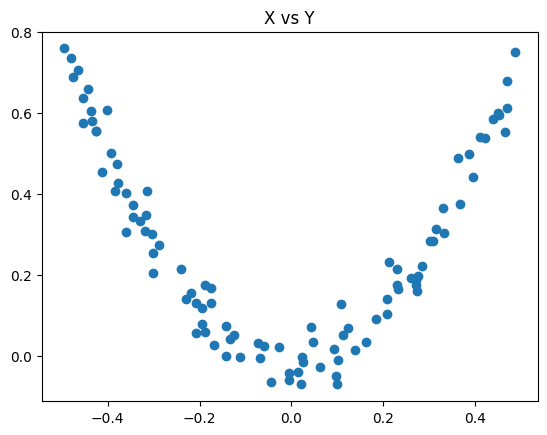

In [2]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3 * X[:, 0]**2 + 0.05 * np.random.randn(100)

df = pd.DataFrame()
df['X'] = X.reshape(100)
df['y'] = y

plt.scatter(df['X'], df['y'])
plt.title('X vs Y')
plt.show()

In [3]:
df['pred1'] = df['y'].mean()

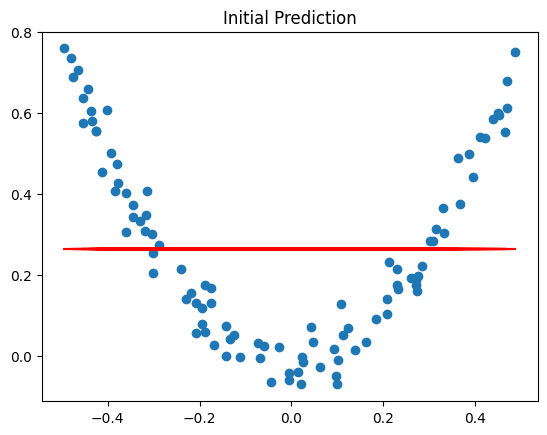

In [7]:
df['res1'] = df['y'] - df['pred1']

plt.scatter(df['X'], df['y'])
plt.plot(df['X'], df['pred1'], color='red')
plt.title('Initial Prediction')
plt.show()

In [8]:
tree1 = DecisionTreeRegressor(max_leaf_nodes=8)
tree1.fit(df['X'].values.reshape(100, 1), df['res1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

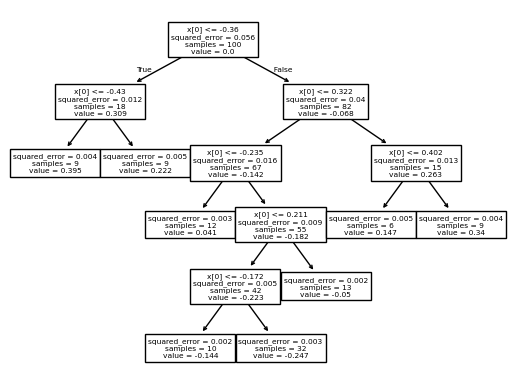

In [9]:
from sklearn.tree import plot_tree
plot_tree(tree1)
plt.show()

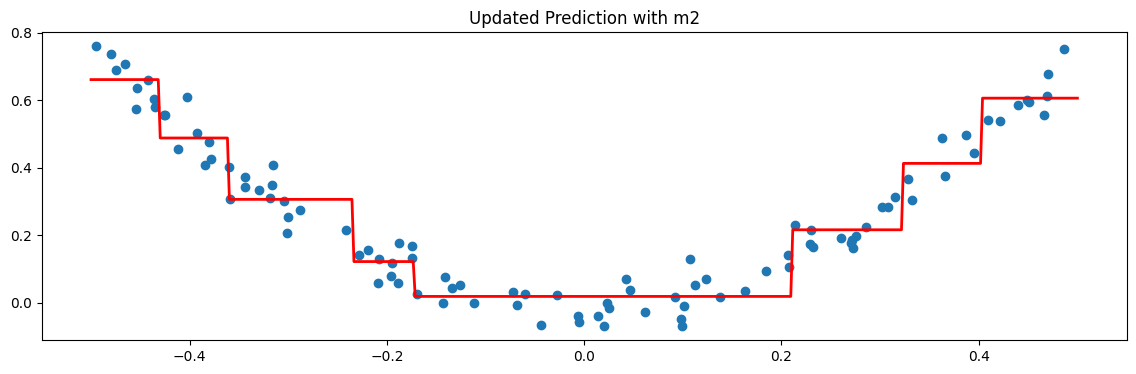

In [10]:
X_test = np.linspace(-0.5, 0.5, 500)
y_pred = df['pred1'].iloc[0] + tree1.predict(X_test.reshape(500, 1))

plt.figure(figsize=(14, 4))
plt.plot(X_test, y_pred, linewidth=2, color='red')
plt.scatter(df['X'], df['y'])
plt.title('Updated Prediction with m2')
plt.show()

In [14]:
df['pred2'] = df['pred1'].iloc[0] + tree1.predict(df['X'].values.reshape(100, 1))
df['res2'] = df['y'] - df['pred2']
tree2 = DecisionTreeRegressor(max_leaf_nodes=8)
tree2.fit(df['X'].values.reshape(100, 1), df['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

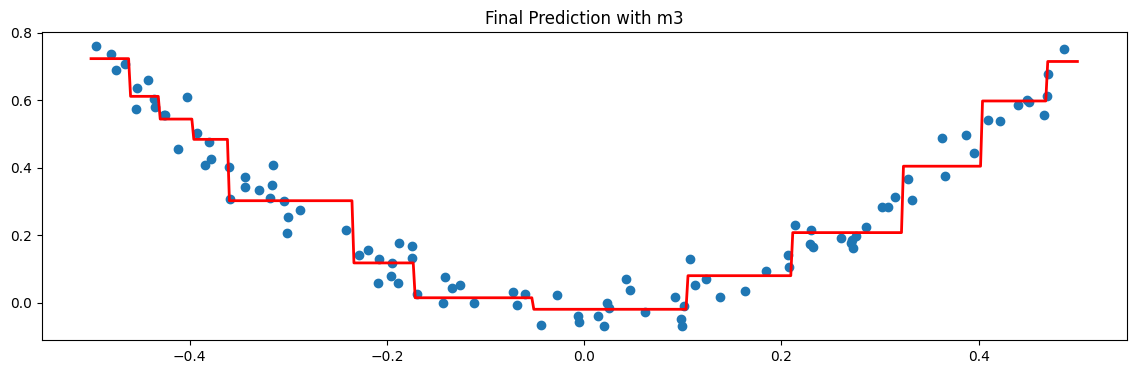

In [13]:
y_pred = df['pred1'].iloc[0] + tree1.predict(X_test.reshape(500, 1)) + tree2.predict(X_test.reshape(500, 1))
plt.figure(figsize=(14, 4))
plt.plot(X_test, y_pred, linewidth=2, color='red')
plt.scatter(df['X'], df['y'])
plt.title('Final Prediction with m3')
plt.show()